### Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv("G:\DS Datasets\IPL Dataset.csv")

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
df.shape

(577, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

### Most Wins in IPL

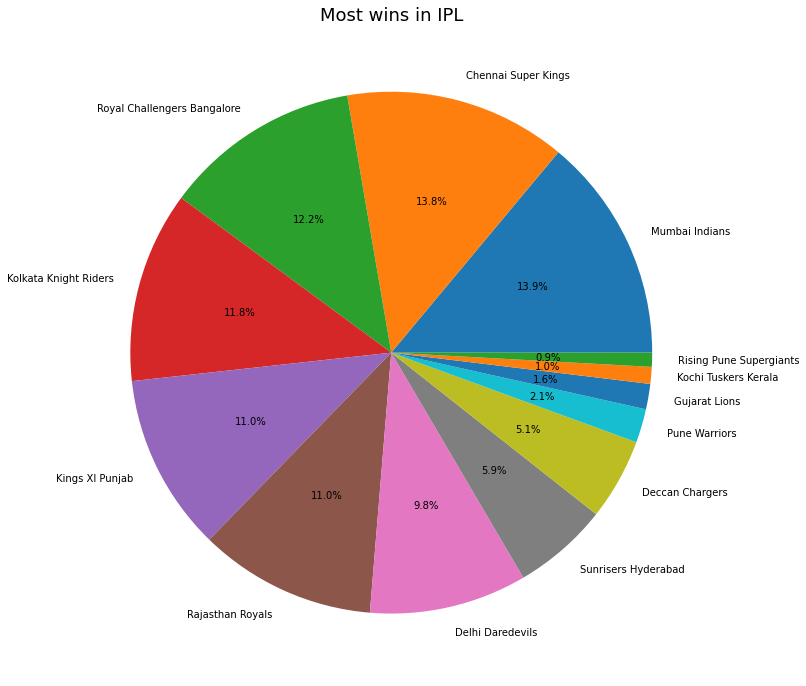

In [7]:
temp = pd.DataFrame({"Winner" : df['winner']})
count_wins = temp.value_counts()
labels = [X[0] for X in count_wins.keys()]

bar , ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x = count_wins, autopct="%.1f%%", labels= labels)
plt.title("Most wins in IPL", fontsize=18)
plt.show()

In [8]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


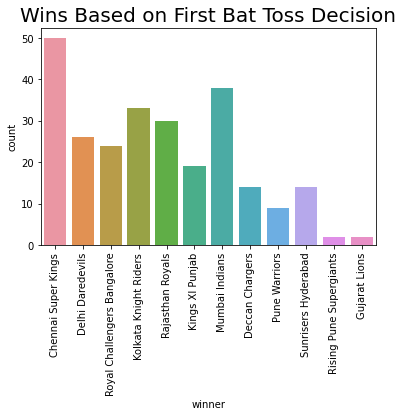

In [9]:
sns.countplot(df['winner'][df['toss_decision']=='bat'], data=df)
plt.title("Wins Based on First Bat Toss Decision", fontsize=20)
plt.xticks(rotation =90)
plt.show()

In [11]:
teams = df['toss_winner'].unique()

decision = pd.DataFrame([], columns= ['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    temp_bat = df[(df['toss_winner']== element) & (df['toss_decision']== 'bat')]
    temp_field = df[(df['toss_winner']== element) & (df['toss_decision']== 'field')]
    
    #append to decision
    decision = decision.append({'Toss Winner': element, 'Decision':'bat', 'Times': temp_bat['toss_winner'].count()}, ignore_index= True)
    decision = decision.append({'Toss Winner': element, 'Decision':'field', 'Times': temp_field['toss_winner'].count()}, ignore_index= True)


In [12]:
decision

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,16
1,Royal Challengers Bangalore,field,45
2,Chennai Super Kings,bat,44
3,Chennai Super Kings,field,22
4,Rajasthan Royals,bat,28
5,Rajasthan Royals,field,35
6,Mumbai Indians,bat,38
7,Mumbai Indians,field,36
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


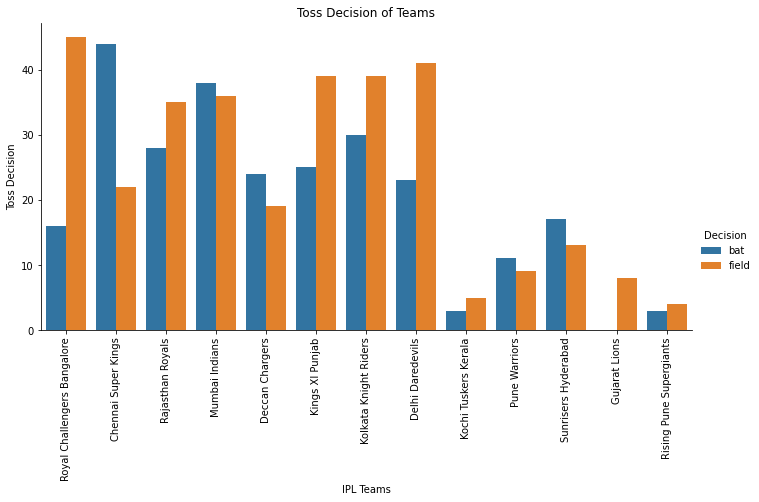

In [15]:
sns.catplot(x= 'Toss Winner',y='Times',hue='Decision',data=decision,kind='bar',height=5,aspect=2)
plt.xticks(rotation = 90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

### Famous Venues

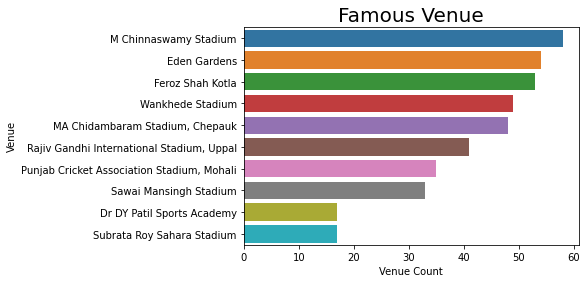

In [18]:
sns.barplot(x= df['venue'].value_counts().head(10).values,
           y = df['venue'].value_counts().head(10).index, data= df)
plt.title('Famous Venue',fontsize=20)
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

### Top 5 Umpire 1

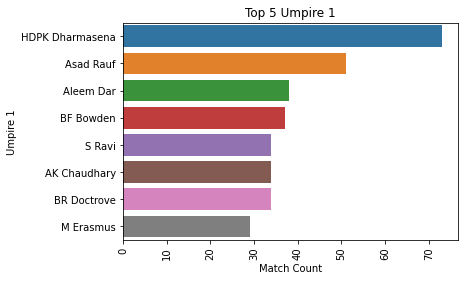

In [20]:
sns.barplot(x= df['umpire1'].value_counts().head(8).values,
           y = df['umpire1'].value_counts().head(8).index, data = df )
plt.xticks(rotation= 90)
plt.xlabel("Match Count")
plt.ylabel("Umpire 1")
plt.title("Top 5 Umpire 1")
plt.show()